In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Ridership Model Data.csv")

In [ ]:
df.head()

,ISOYear,Month,ISOWeek,Total Boardings,Start of Week,Revenue Hours,Restaurant Bookings,Gas Price (C/L),University School Season,Employment,WFH,Population Growth Rate,BC Vaccination Rate,hospitalizations,critical cases
0,2019,1,1,337533.0,43465.0,12526.5,0.0,135.0,3.0,2651.0,2.1,0.02,1.0,0.0,0.0
1,2019,1,2,673937.0,43472.0,12526.5,0.0,133.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
2,2019,1,3,676048.0,43479.0,12526.5,0.0,132.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
3,2019,1,4,668159.0,43486.0,12526.5,0.0,130.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0
4,2019,1,5,666372.0,43493.0,12526.5,0.0,126.0,1.0,2651.0,2.1,0.02,1.0,0.0,0.0


In [ ]:
ridership_data = df.drop(['ISOYear','Month','ISOWeek','Start of Week','Population Growth Rate'], axis=1)
ridership_data.head()

,Total Boardings,Revenue Hours,Restaurant Bookings,Gas Price (C/L),University School Season,Employment,WFH,BC Vaccination Rate,hospitalizations,critical cases
0,337533.0,12526.5,0.0,135.0,3.0,2651.0,2.1,1.0,0.0,0.0
1,673937.0,12526.5,0.0,133.0,1.0,2651.0,2.1,1.0,0.0,0.0
2,676048.0,12526.5,0.0,132.0,1.0,2651.0,2.1,1.0,0.0,0.0
3,668159.0,12526.5,0.0,130.0,1.0,2651.0,2.1,1.0,0.0,0.0
4,666372.0,12526.5,0.0,126.0,1.0,2651.0,2.1,1.0,0.0,0.0


In [ ]:
features = ridership_data.drop('Total Boardings', axis=1)
boardings = ridership_data['Total Boardings']

In [ ]:
school_season = pd.get_dummies(features['University School Season'],drop_first=True,columns=['Uni 2', 'Uni 3'])
school_season.head()

,2.0,3.0
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
features = pd.concat([features.drop('University School Season',axis=1),school_season], axis=1)
features.rename(columns={2.0:'Uni 2', 3.0:'Uni 3'})
features.head()

,Revenue Hours,Restaurant Bookings,Gas Price (C/L),Employment,WFH,BC Vaccination Rate,hospitalizations,critical cases,2.0,3.0
0,12526.5,0.0,135.0,2651.0,2.1,1.0,0.0,0.0,0,1
1,12526.5,0.0,133.0,2651.0,2.1,1.0,0.0,0.0,0,0
2,12526.5,0.0,132.0,2651.0,2.1,1.0,0.0,0.0,0,0
3,12526.5,0.0,130.0,2651.0,2.1,1.0,0.0,0.0,0,0
4,12526.5,0.0,126.0,2651.0,2.1,1.0,0.0,0.0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,boardings,test_size=.15)

In [ ]:
r_train, r_test, p_train, p_test = train_test_split(ridership_data.drop('Total Boardings',axis=1),ridership_data['Total Boardings'],test_size=.3)

In [ ]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

0.7860937660674958

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
r_preds = regr.predict(x_test)

In [ ]:
mean_absolute_error(y_test,r_preds) / boardings.mean()

0.14386572405613612

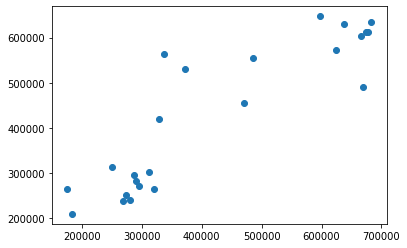

In [ ]:
plt.scatter(y_test, r_preds)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features.drop([2.0,3.0],axis=1))
scaled_features = scaler.transform(features.drop([2.0,3.0],axis=1))
scaled_features = pd.DataFrame(scaled_features,columns=features.columns[:-2])
scaled_features.head()

,Revenue Hours,Restaurant Bookings,Gas Price (C/L),Employment,WFH,BC Vaccination Rate,hospitalizations,critical cases
0,0.819174,1.037816,-0.239209,0.402238,-1.162049,1.045457,-0.790558,-0.769446
1,0.819174,1.037816,-0.356938,0.402238,-1.162049,1.045457,-0.790558,-0.769446
2,0.819174,1.037816,-0.415803,0.402238,-1.162049,1.045457,-0.790558,-0.769446
3,0.819174,1.037816,-0.533533,0.402238,-1.162049,1.045457,-0.790558,-0.769446
4,0.819174,1.037816,-0.768992,0.402238,-1.162049,1.045457,-0.790558,-0.769446


In [ ]:
features[2.0]

0      0
1      0
2      0
3      0
4      0
      ..
152    0
153    0
154    0
155    0
156    1
Name: 2.0, Length: 157, dtype: uint8

In [ ]:
# features = pd.concat([scaled_features,features[2.0],features[3.0]],axis=1)
features.head()

,Revenue Hours,Restaurant Bookings,Gas Price (C/L),Employment,WFH,BC Vaccination Rate,hospitalizations,critical cases,2.0,3.0
0,0.819174,1.037816,-0.239209,0.402238,-1.162049,1.045457,-0.790558,-0.769446,0,1
1,0.819174,1.037816,-0.356938,0.402238,-1.162049,1.045457,-0.790558,-0.769446,0,0
2,0.819174,1.037816,-0.415803,0.402238,-1.162049,1.045457,-0.790558,-0.769446,0,0
3,0.819174,1.037816,-0.533533,0.402238,-1.162049,1.045457,-0.790558,-0.769446,0,0
4,0.819174,1.037816,-0.768992,0.402238,-1.162049,1.045457,-0.790558,-0.769446,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features,boardings,test_size=.3)
regr = LinearRegression()
regr.fit(x_train, y_train)
regr.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8090845100353246

In [ ]:
regr.fit(r_train, p_train)
regr.score(r_test, p_test)

0.8426967706277707

In [ ]:
from sklearn.linear_model import TweedieRegressor
tregr = TweedieRegressor(power=1)
tregr.fit(x_train,y_train)
tregr.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8339346150316035

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


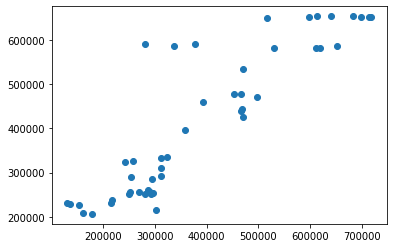

In [ ]:
plt.scatter(y_test,tregr.predict(x_test))

In [ ]:
tregr.fit(r_train, p_train)
tregr.score(r_test, p_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning: invalid value encountered in add
  dev = 2 * (xlogy(y, y / y_pred) - y + y_pred)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_r

-0.0004933025723012907

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.1)
lasso.fit(x_train,y_train)
lasso.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7661867233226536

In [ ]:
lasso.fit(r_train, p_train)
lasso.score(r_test, p_test)

0.8426974361466623

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=.1)
elastic.fit(x_train,y_train)
elastic.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.7555064067816402

In [ ]:
elastic.fit(r_train, p_train)
elastic.score(r_test, p_test)

0.848643140024609